In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/health-care-data-set-on-heart-attack-possibility/heart.csv


In [2]:
import glob
import os


In [3]:
import pandas as pd
import numpy as np

In [4]:
df = pd.read_csv('../input/health-care-data-set-on-heart-attack-possibility/heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


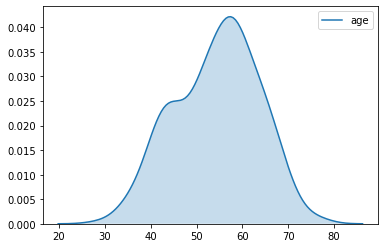

In [5]:
import seaborn as sn

sn.kdeplot(df.age, shade = True)



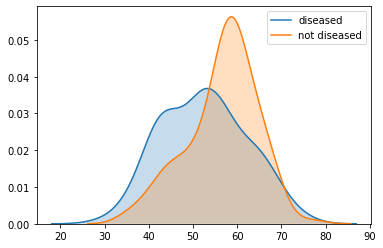

In [6]:
sn.kdeplot(df[df['target'] == 1].age, shade = True, label = 'diseased')
sn.kdeplot(df[df['target'] == 0].age, shade = True, label = 'not diseased')

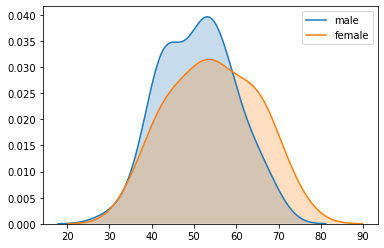

In [7]:
sn.kdeplot(df[(df['target'] == 1) & (df['sex'] == 1)].age, shade = True, label = 'male')
sn.kdeplot(df[(df['target'] == 1) & (df['sex'] == 0)].age, shade = True, label = 'female')

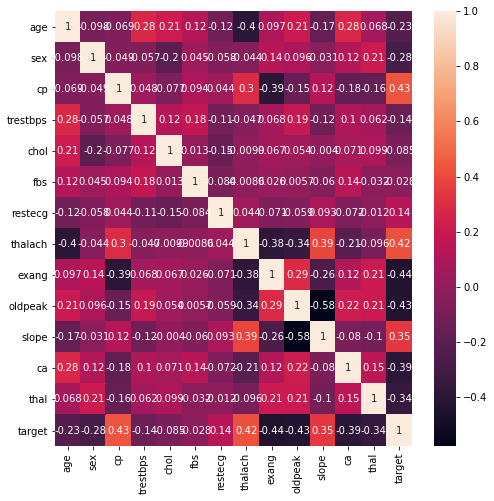

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize = (8,8))
sn.heatmap(df.corr(), annot = True)

In [9]:
#CORRELATION WITH RESPONSE
dummy = df.copy().drop(columns = ['target'])
dummy


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


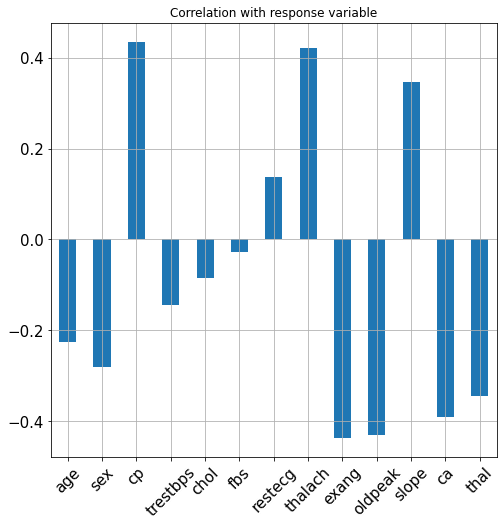

In [10]:

dummy.corrwith(df.target).plot.bar(figsize = (8,8),
                                      title = 'Correlation with response variable',
                                      fontsize = 15, rot = 45,
                                      grid = True)

In [11]:
df = df.drop(columns = ['fbs', 'chol', 'trestbps'])

In [12]:
df.head()

,age,sex,cp,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,0,150,0,2.3,0,0,1,1
1,37,1,2,1,187,0,3.5,0,0,2,1
2,41,0,1,0,172,0,1.4,2,0,2,1
3,56,1,1,1,178,0,0.8,2,0,2,1
4,57,0,0,1,163,1,0.6,2,0,2,1


In [13]:
df.isna().any()

age        False
sex        False
cp         False
restecg    False
thalach    False
exang      False
oldpeak    False
slope      False
ca         False
thal       False
target     False
dtype: bool

In [14]:
from sklearn.preprocessing import StandardScaler

y = df.target
x = df.drop(columns = ['target'])

In [15]:
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [16]:
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb


def models(xtrain, xtest, ytrain, ytest):
    
    #logistic regression
    lrmodel = LogisticRegression(random_state = 0)
    lrmodel.fit(xtrain, ytrain)
    lrypred = lrmodel.predict(xtest)
    
    
    #decision tree
    dtmodel = tree.DecisionTreeClassifier()
    dtmodel.fit(xtrain, ytrain)
    dtypred = dtmodel.predict(xtest)
    tree.plot_tree(dtmodel)
    
    
    #random forest
    rfmodel = RandomForestClassifier(max_depth = 8, random_state = 42)
    rfmodel.fit(xtrain, ytrain)
    rfypred = rfmodel.predict(xtest)
    
    
    #SVM
    svmodel = SVC(random_state = 0, kernel = 'linear')
    svmodel.fit(xtrain, ytrain)
    svypred = svmodel.predict(xtest)
    
    
    #Gradient boosting classifier
    gbmodel = GradientBoostingClassifier(random_state = 0)
    gbmodel.fit(xtrain, ytrain)
    gbypred = gbmodel.predict(xtest)
    
    
    #XGBoost
    xgbmodel = xgb.XGBRegressor(objective = 'reg:logistic', random_state = 42)
    xgbmodel.fit(xtrain, ytrain)
    xgbypred = xgbmodel.predict(xtest)
    for i in range(len(xgbypred)):
        if xgbypred[i] >= 0.5:
            xgbypred[i]=1
        else:
            xgbypred[i]=0
    
    return lrypred, dtypred, rfypred, svypred, gbypred, xgbypred

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


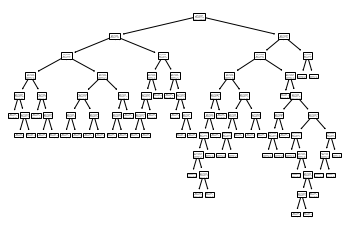

In [17]:
lr, dt, rf, svm, gb, xgb = models (xtrain, xtest, ytrain, ytest)

In [18]:
xgb

array([0., 1., 0., 0., 1., 1., 1., 0., 0., 0., 1., 0., 1., 0., 1., 1., 1.,
       0., 0., 0., 1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 0., 0., 0., 0.,
       1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 0., 0., 0.,
       0., 1., 1., 0., 0., 1., 1., 0., 0., 0.], dtype=float32)

In [19]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score

In [20]:
# results for Logistic regression


ac = accuracy_score(ytest, lr)
f1 = f1_score(ytest, lr)
ps = precision_score(ytest, lr)
rs = recall_score(ytest, lr)

results = pd.DataFrame([['Logistic regression', ac, f1, ps, rs ]], columns = ['Model', 'Accuracy', 'F1 score', 'Precision', 'Recall score'])


In [21]:
models = [dt, rf, svm, gb, xgb]
model_names = ['Decision tree', 'Random forest', 'SVM', 'Gradient boost', 'XG boost']
index = 0


for model in models:
    
    ac = accuracy_score(ytest, model)
    f1 = f1_score(ytest, model)
    ps = precision_score(ytest, model)
    rs = recall_score(ytest, model)

    temp_results = pd.DataFrame([[model_names[index], ac, f1, ps, rs ]], columns = ['Model', 'Accuracy', 'F1 score', 'Precision', 'Recall score'])
    results = results.append(temp_results, ignore_index = True)
    index = index + 1
    print(results)
    print("\n")


                 Model  Accuracy  F1 score  Precision  Recall score
0  Logistic regression  0.885246  0.892308   0.878788       0.90625
1        Decision tree  0.786885  0.771930   0.880000       0.68750


                 Model  Accuracy  F1 score  Precision  Recall score
0  Logistic regression  0.885246  0.892308   0.878788       0.90625
1        Decision tree  0.786885  0.771930   0.880000       0.68750
2        Random forest  0.852459  0.861538   0.848485       0.87500


                 Model  Accuracy  F1 score  Precision  Recall score
0  Logistic regression  0.885246  0.892308   0.878788       0.90625
1        Decision tree  0.786885  0.771930   0.880000       0.68750
2        Random forest  0.852459  0.861538   0.848485       0.87500
3                  SVM  0.885246  0.892308   0.878788       0.90625


                 Model  Accuracy  F1 score  Precision  Recall score
0  Logistic regression  0.885246  0.892308   0.878788       0.90625
1        Decision tree  0.786885  0.771930

In [22]:
results

,Model,Accuracy,F1 score,Precision,Recall score
0,Logistic regression,0.885246,0.892308,0.878788,0.90625
1,Decision tree,0.786885,0.771930,0.880000,0.68750
2,Random forest,0.852459,0.861538,0.848485,0.87500
3,SVM,0.885246,0.892308,0.878788,0.90625
4,Gradient boost,0.786885,0.793651,0.806452,0.78125
5,XG boost,0.819672,0.830769,0.818182,0.84375


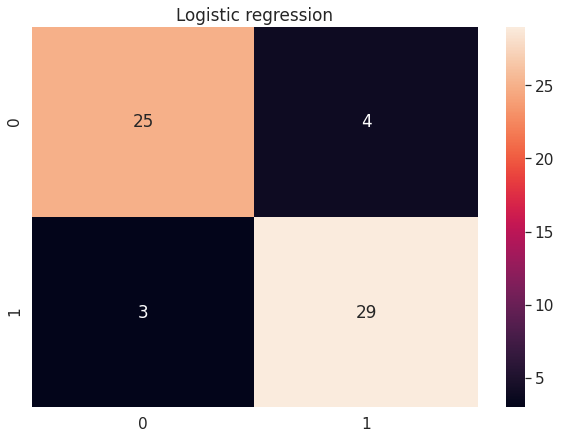

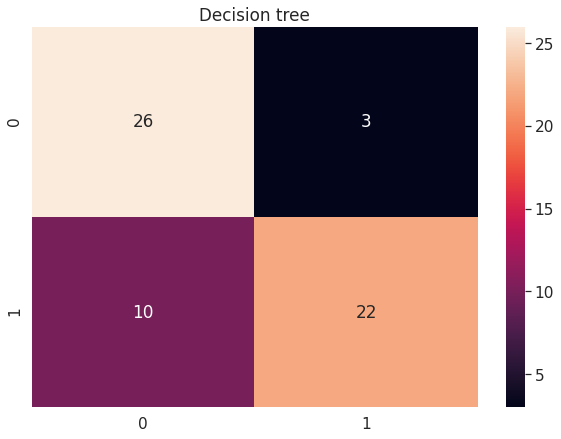

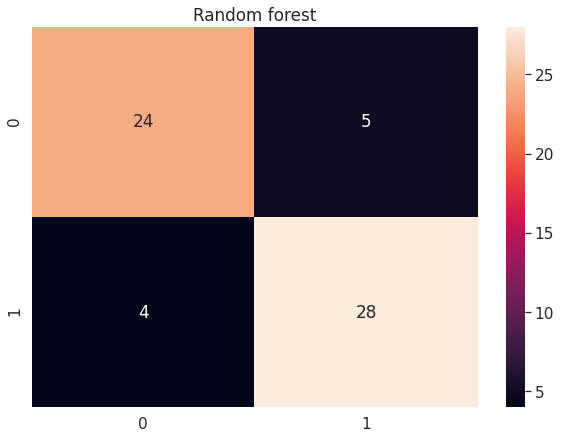

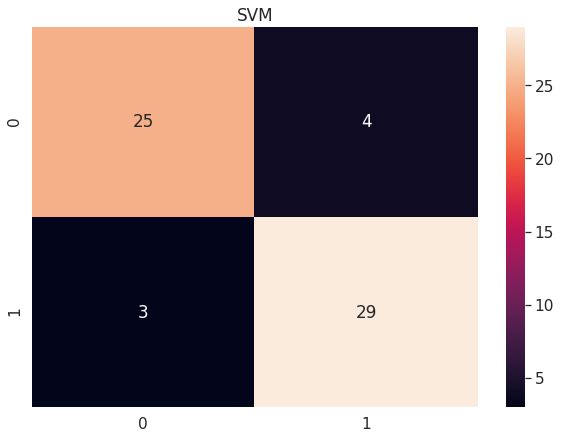

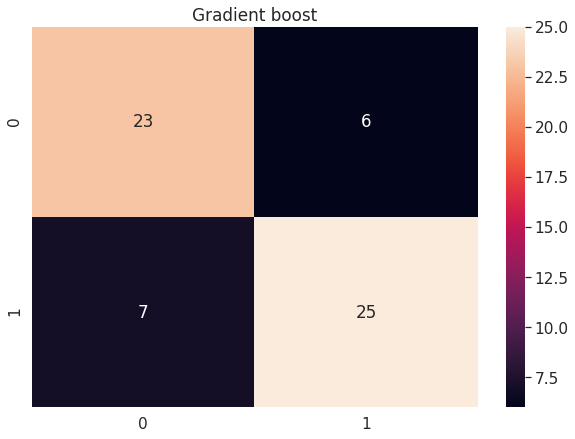

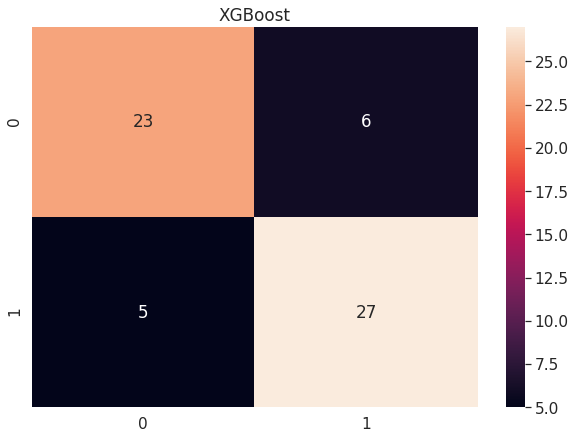

In [23]:
import numpy as np

lrcm = confusion_matrix(ytest, lr)
dtcm = confusion_matrix(ytest, dt)
rfcm = confusion_matrix(ytest, rf)
svmcm = confusion_matrix(ytest, svm)
gbcm = confusion_matrix(ytest, gb)
xgbcm = confusion_matrix(ytest, xgb)


models_list = [lrcm,  dtcm, rfcm, svmcm, gbcm, xgbcm]
model_names = ['Logistic regression', 'Decision tree', 'Random forest', 'SVM', 'Gradient boost', 'XGBoost']
row = 0

for cl in models_list:
    df_cm = pd.DataFrame(cl, index = (0,1), columns = (0,1))
    plt.figure(figsize = (10,7))
    sn.set(font_scale = 1.4)
    sn.heatmap(df_cm, annot = True, fmt = 'g')
    plt.title(model_names[row])
    row = row+1
 